# 1.Normal Density recovery using COS method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [6]:
def COSDensity(cf, x, N, a, b):
    """
    Input : 
    - cf = characteristic function
    """
    i = np.complex(0, 1)
    k = np.linspace(0, N-1, N)
    u = np.zeros([1, N])
    u = k * np.pi/ (b - a)
    
    # F_k coefficients
    F_k    = 2 / (b - a) * np.real(cf(u) * np.exp(-i * u * a))
    F_k[0] = F_k[0]* 0.5 # adjustment for the first term of Fourier serie
    
    # Final calculation for density
    f_X = np.matmul(F_k, np.cos(np.outer(u, x - a)))
    
    # Get only the first row as the output
    return f_X

In [45]:
a = -10
b = 10
N = 4
k = np.linspace(0, N-1, N)
u = np.zeros([1, N])
u = k * np.pi/ (b - a)
    
x = np.linspace(-5, 5, 11)

In [47]:
np.outer(u, x - a)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.78539816, 0.9424778 , 1.09955743, 1.25663706, 1.41371669,
        1.57079633, 1.72787596, 1.88495559, 2.04203522, 2.19911486,
        2.35619449],
       [1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
        3.14159265, 3.45575192, 3.76991118, 4.08407045, 4.39822972,
        4.71238898],
       [2.35619449, 2.82743339, 3.29867229, 3.76991118, 4.24115008,
        4.71238898, 5.18362788, 5.65486678, 6.12610567, 6.59734457,
        7.06858347]])

In [42]:
def mainCalculation():
    i = np.complex(0, 1) # i = sqrt(-1)
    
    # Setting for the COS method
    a = -10
    b = 10
    
    # Define the range for the expansion points
    N = [2**x for x in range(2,7,1)]
    
    # Setting for Normal distribution
    mu = 0
    sigma = 1
    
    # Define characteristic function for the normal distribution
    cF = lambda u : np.exp(i * mu * u - 0.5 * np.power(sigma, 2) * np.power(u ,2))
    
    # Define domain for density
    x = np.linspace(-5, 5, 11)
    # Exact Density of Normal Distribution
    f_XExact = st.norm.pdf(x, mu, sigma)
    
    plt.figure(1)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("$f_X(x)$")
    
    for n in N:
        f_X = COSDensity(cF, x, n, a, b)
        error = np.max(np.abs(f_X - f_XExact))
        print("for {0} expansion terms the error is {1}".format(n, error))
        #print(f_X)
        plt.plot(x, f_X)
        
    plt.legend(["4","8","16","32", "64"])

for 4 expansion terms the error is 0.25375729966450533
[0.05       0.07941378 0.10594833 0.12700627 0.1405263  0.14518498
 0.1405263  0.12700627 0.10594833 0.07941378 0.05      ]
for 8 expansion terms the error is 0.10753236532743593
[-0.03208687 -0.03888468  0.01958317  0.13255275  0.24463538  0.29140992
  0.24463538  0.13255275  0.01958317 -0.03888468 -0.03208687]
for 16 expansion terms the error is 0.007175052932337445
[-0.00360525  0.00228864  0.00501448  0.05025506  0.24819981  0.39176723
  0.24819981  0.05025506  0.00501448  0.00228864 -0.00360525]
for 32 expansion terms the error is 4.037605122464427e-07
[1.17161198e-06 1.33789571e-04 4.43217537e-03 5.39912449e-02
 2.41970575e-01 3.98941877e-01 2.41970575e-01 5.39912449e-02
 4.43217537e-03 1.33789571e-04 1.17161198e-06]
for 64 expansion terms the error is 8.413408858487514e-17
[1.48671951e-06 1.33830226e-04 4.43184841e-03 5.39909665e-02
 2.41970725e-01 3.98942280e-01 2.41970725e-01 5.39909665e-02
 4.43184841e-03 1.33830226e-04 1

C:\Users\NGUYEN Xuan Vinh\AppData\Local\Temp\ipykernel_9280\4230540072.py:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  i = np.complex(0, 1) # i = sqrt(-1)
C:\Users\NGUYEN Xuan Vinh\AppData\Local\Temp\ipykernel_9280\1505725280.py:6: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  i = np.complex(0, 1)
C:\Users\NGUYEN Xua

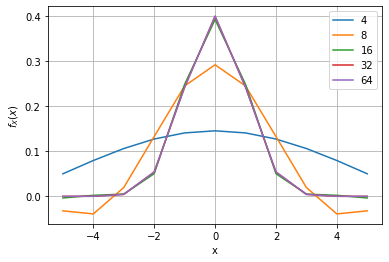

In [43]:
mainCalculation()

N number of expansion points, in this case 64 points is enough but when we deal with distribution with heavier tail N may be much higher 

# 2. Lognormal Density recovery using COS method

In [53]:
def log_mainCalculation():
    i = np.complex(0, 1) # i = sqrt(-1)
    
    # Setting for the COS method
    a = -10
    b = 10
    
    # Define the range for the expansion points
    N = [16, 64, 128]
    
    # Setting for Normal distribution
    mu = 0.5
    sigma = 0.2
    
    # Define characteristic function for the normal distribution
    cF = lambda u : np.exp(i * mu * u - 0.5 * np.power(sigma, 2) * np.power(u ,2))
    
    # Define domain for density
    y = np.linspace(0.05, 5, 1000)
    # Exact Density of Normal Distribution
    f_XExact = st.norm.pdf(x, mu, sigma)
    
    plt.figure(1)
    plt.grid()
    plt.xlabel("y")
    plt.ylabel("$f_Y(y)$")
    
    for n in N:
        f_Y = 1/y * COSDensity(cF, np.log(y), n, a, b)
        #print(f_Y)
        plt.plot(y, f_Y)
        
    plt.legend(["N = %.0f"%N[0],"N = %.0f"%N[1],"N = %.0f"%N[2]])

C:\Users\NGUYEN Xuan Vinh\AppData\Local\Temp\ipykernel_9280\2647203751.py:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  i = np.complex(0, 1) # i = sqrt(-1)
C:\Users\NGUYEN Xuan Vinh\AppData\Local\Temp\ipykernel_9280\1505725280.py:6: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  i = np.complex(0, 1)
C:\Users\NGUYEN Xua

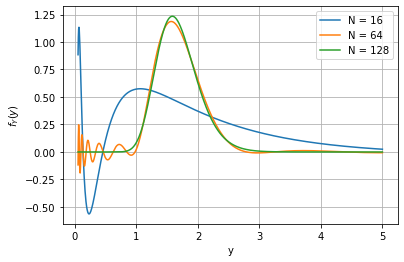

In [54]:
log_mainCalculation()